In this challenge, we want to train a classifier for sequences of genetic code.

Each sequence is represented by a string of letters [‘A’, ‘C’, ‘G’, ’T’] and belongs to one of five categories/classes labelled [0,…,4].

For training purposes, you will find 400 labelled sequences, each of length 400 characters (sequences: data_x, labels: data_y).

To validate your model, you have a further 100 labelled sequences (val_x, val_y) with 1200 characters each.

Finally, you have 250 unlabeled sequences (test_x, 2000 characters) which need to be classified.

Hint: Training recurrent networks is very expensive! Do not start working on this challenge too late or you will not manage to finish in time.

Your task is to train an RNN-based classifier and make a prediction for the missing labels of the test set (test_x in the attached archive). Store your prediction as a one-dimensional numpy.ndarray, save this array as prediction.npy, and upload this file to the KVV.

You will receive points according to the achieved accuracy according to the following table:
accuracy 	points

≥95%=10, ≥90%=7, ≥85%=5

In [1]:
import numpy as np
import matplotlib.pyplot as plt

with np.load('rnn-challenge-data.npz') as fh:
    x_train_data = fh['data_x']
    y_train_data = fh['data_y']
    x_val_data = fh['val_x']
    y_val_data = fh['val_y']
    x_test_data = fh['test_x']

# x_train_data = np.reshape(x_train_data,(x_train_data.shape[0], 1, x_train_data.shape[1]))
print("\nx_train_data:")
print(x_train_data.shape, x_train_data.dtype, type(x_train_data))
print(x_train_data[:1])
print("\ny_train_data:")
print(y_train_data.shape, y_train_data.dtype, type(y_train_data))
print(y_train_data[:3])

print("\nx_val_data:")
print(x_val_data.shape, x_val_data.dtype, type(x_val_data))
print(x_val_data[:1])
print("\ny_val_data:")
print(y_val_data.shape, y_val_data.dtype, type(y_val_data))
print(y_val_data[:3])

# TEST DATA: INPUT (x) ONLY
print("\nx_test_data")
print(x_test_data.shape, x_test_data.dtype, type(x_test_data))
print(x_test_data[:1])



# print(data_x[0].shape)
# print(data_x[5][0]) # this is where the matrix is at - (see shape)



x_train_data:
(400,) <U400 <class 'numpy.ndarray'>
['CTAGCTGAGCTACTGAGCTACAGTTGACTGACCAGTCAGTGCTAGCTACTGACAGTCTGACAGTTGACCTGACTGATGACCAGTCTAGCAGTGCTACTAGCTAGGCTACAGTCAGTTGACCAGTCTGACAGTCAGTCTGACTGACAGTCAGTCTAGGCTATGACCTGACTGATGACCTGACTGACTGACAGTCTGACTGATGACGCTATGACCTGACTAGCTAGCAGTTGACTGACCTGACAGTGCTACTAGCAGTTGACCAGTGCTACAGTCTGATGACTGACCTGACAGTCTAGGCTACAGTTGACCTGACAGTCAGTGCTACTGACAGTCTAGTGACCAGTCAGTCAGTTGACCTGACTAGCAGTTGACGCTATGACCAGTCTGACAGTGCTACTAG']

y_train_data:
(400,) int64 <class 'numpy.ndarray'>
[2 0 0]

x_val_data:
(100,) <U1200 <class 'numpy.ndarray'>
['GTCAAGTCAGTCAGTCGATCAGTCGTCAGTCAAGTCGTCACAGTGATCAGTCGTCACAGTGTCAGTCACAGTCTGACAGTGATCCTGACAGTAGTCGATCCTGACAGTCAGTAGTCCAGTGTCACTGAGATCGATCGATCGTCACAGTAGTCCAGTGATCCTGACAGTCTGAGATCGATCGATCAGTCAGTCGTCAGTCACAGTCTGACTGAGTCAAGTCGTCACAGTAGTCAGTCGTCAGTCACAGTAGTCCAGTGATCGATCAGTCGTCAGTCAAGTCCAGTAGTCGTCACAGTGTCACTGACTGAGTCACAGTAGTCCAGTCAGTGTCACAGTCTGACAGTGATCCTGAAGTCGATCCTGAGTCACAGTCTGACAGTGTCAAGTCAGTCGATCGATCGATCCAGTGTCAAGTCCTGACAGTGATCCA

In [2]:
# print(type(x_train_data))
# print(type(x_val_data))
# print(type(x_test_data))
# print(x_train_data.shape)
# print(x_val_data.shape)
# print(x_test_data.shape)

# print(len(x_val_data[0]))

char2vec = {'A':np.array([1,0,0,0], dtype=float),'C':np.array([0,1,0,0], dtype=float), 'G':np.array([0,0,1,0], dtype=float), 'T':np.array([0,0,0,1], dtype=float)}
x_train_data_floats = np.array([np.array([char2vec[x] for x in x_train_data[j]]) for j in range(len(x_train_data))])
x_val_data_floats = np.array([np.array([char2vec[x1] for x1 in x_val_data[j1]]) for j1 in range(len(x_val_data))])
x_test_data_floats = np.array([np.array([char2vec[x2] for x2 in x_test_data[j2]]) for j2 in range(len(x_test_data))])
# print(type(x_train_data_ints))
# print(type(x_val_data_ints))
# print(type(x_test_data_ints))
# print(x_train_data_ints.shape)
# print(x_val_data_ints.shape)
# print(x_test_data_ints.shape)
# print(type(x_train_data_ints[0][0][0]))

In [3]:
from sklearn.preprocessing import OneHotEncoder
y_train_data_ohe = y_train_data.reshape(-1,1)
y_val_data_ohe = y_val_data.reshape(-1,1)
# print(type(y_train_data_ohe))
# print(type(y_val_data_ohe))
# print(y_train_data_ohe[:3])
# print(y_val_data_ohe[:3])


onehot_encoder = OneHotEncoder(sparse=False)
y_train_data_ohe = onehot_encoder.fit_transform(np.array(y_train_data_ohe))
y_val_data_ohe = onehot_encoder.fit_transform(np.array(y_val_data_ohe))
# print(y_train_data_ohe[:3])
# print(y_val_data_ohe[:3])

In [4]:
# TRAIN MODEL ON x_train, y_train
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D,LSTM
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


from tensorflow.keras.optimizers import SGD
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# create the model
model = Sequential()
# model.add(LSTM(100, return_sequences=False, input_shape=(None, 1)))
model.add(LSTM(100, return_sequences=False))
# model.add(Flatten())
model.add(Dense(units = 5, activation="sigmoid"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Keras Custom Callback
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

my_callback = MyThresholdCallback(threshold=0.99)
history = model.fit(x_train_data_floats,
                    y_train_data_ohe,
                    validation_data=(x_val_data_floats, y_val_data_ohe),
                    epochs=6000,
                    batch_size=64,
                    callbacks=[my_callback])

scores = model.evaluate(x_val_data_floats, y_val_data_ohe, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/6000
7/7 [==============================] - 3s 219ms/step - loss: 1.6129 - accuracy: 0.1725 - val_loss: 1.6086 - val_accuracy: 0.2100
Epoch 2/6000
7/7 [==============================] - 1s 130ms/step - loss: 1.6066 - accuracy: 0.2325 - val_loss: 1.6065 - val_accuracy: 0.3100
Epoch 3/6000
7/7 [==============================] - 1s 131ms/step - loss: 1.6040 - accuracy: 0.2400 - val_loss: 1.6054 - val_accuracy: 0.1600
Epoch 4/6000
7/7 [==============================] - 1s 130ms/step - loss: 1.6003 - accuracy: 0.2750 - val_loss: 1.6034 - val_accuracy: 0.2300
Epoch 5/6000
7/7 [==============================] - 1s 129ms/step - loss: 1.5975 - accuracy: 0.2850 - val_loss: 1.6015 - val_accuracy: 0.2200
Epoch 6/6000
7/7 [==============================] - 1s 130ms/step - loss: 1.5948 - accuracy: 0.3275 - val_loss: 1.5991 - val_accuracy: 0.2600
Epoch 7/6000
7/7 [==============================] - 1s 129ms/step - loss: 1.5904 - accuracy: 0.2750 - val_loss: 1.5977 - val_accuracy: 0.2200
Epoch 

7/7 [==============================] - 1s 130ms/step - loss: 1.5220 - accuracy: 0.2875 - val_loss: 1.5500 - val_accuracy: 0.2800
Epoch 59/6000
7/7 [==============================] - 1s 130ms/step - loss: 1.5191 - accuracy: 0.3025 - val_loss: 1.5483 - val_accuracy: 0.2400
Epoch 60/6000
7/7 [==============================] - 1s 132ms/step - loss: 1.5168 - accuracy: 0.2975 - val_loss: 1.5465 - val_accuracy: 0.2400
Epoch 61/6000
7/7 [==============================] - 1s 132ms/step - loss: 1.5143 - accuracy: 0.3125 - val_loss: 1.5448 - val_accuracy: 0.2500
Epoch 62/6000
7/7 [==============================] - 1s 132ms/step - loss: 1.5120 - accuracy: 0.3175 - val_loss: 1.5430 - val_accuracy: 0.2400
Epoch 63/6000
7/7 [==============================] - 1s 133ms/step - loss: 1.5094 - accuracy: 0.3075 - val_loss: 1.5412 - val_accuracy: 0.2400
Epoch 64/6000
7/7 [==============================] - 1s 131ms/step - loss: 1.5068 - accuracy: 0.3175 - val_loss: 1.5393 - val_accuracy: 0.2500
Epoch 65/6000

7/7 [==============================] - 1s 140ms/step - loss: 0.9348 - accuracy: 0.6175 - val_loss: 0.8579 - val_accuracy: 0.6800
Epoch 116/6000
7/7 [==============================] - 1s 134ms/step - loss: 0.8518 - accuracy: 0.6725 - val_loss: 0.7931 - val_accuracy: 0.7000
Epoch 117/6000
7/7 [==============================] - 1s 135ms/step - loss: 0.7689 - accuracy: 0.7100 - val_loss: 0.7391 - val_accuracy: 0.7500
Epoch 118/6000
7/7 [==============================] - 1s 133ms/step - loss: 0.7086 - accuracy: 0.7175 - val_loss: 0.6299 - val_accuracy: 0.7600
Epoch 119/6000
7/7 [==============================] - 1s 139ms/step - loss: 0.7298 - accuracy: 0.7150 - val_loss: 2.7345 - val_accuracy: 0.2200
Epoch 120/6000
7/7 [==============================] - 1s 139ms/step - loss: 2.7749 - accuracy: 0.2475 - val_loss: 2.6824 - val_accuracy: 0.2400
Epoch 121/6000
7/7 [==============================] - 1s 140ms/step - loss: 2.4557 - accuracy: 0.2325 - val_loss: 2.2668 - val_accuracy: 0.2200
Epoch 1

Epoch 172/6000
7/7 [==============================] - 1s 145ms/step - loss: 1.6311 - accuracy: 0.3550 - val_loss: 1.7030 - val_accuracy: 0.3700
Epoch 173/6000
7/7 [==============================] - 1s 145ms/step - loss: 1.5437 - accuracy: 0.3400 - val_loss: 1.6043 - val_accuracy: 0.3500
Epoch 174/6000
7/7 [==============================] - 1s 173ms/step - loss: 1.5013 - accuracy: 0.3550 - val_loss: 1.5215 - val_accuracy: 0.3400
Epoch 175/6000
7/7 [==============================] - 1s 160ms/step - loss: 1.4138 - accuracy: 0.3950 - val_loss: 1.2860 - val_accuracy: 0.4200
Epoch 176/6000
7/7 [==============================] - 1s 142ms/step - loss: 1.3213 - accuracy: 0.4750 - val_loss: 1.2653 - val_accuracy: 0.5500
Epoch 177/6000
7/7 [==============================] - 1s 140ms/step - loss: 1.3247 - accuracy: 0.4450 - val_loss: 1.2594 - val_accuracy: 0.4400
Epoch 178/6000
7/7 [==============================] - 1s 142ms/step - loss: 1.2429 - accuracy: 0.4675 - val_loss: 1.2454 - val_accuracy:

Epoch 229/6000
7/7 [==============================] - 1s 155ms/step - loss: 1.4402 - accuracy: 0.3850 - val_loss: 1.4598 - val_accuracy: 0.2900
Epoch 230/6000
7/7 [==============================] - 1s 159ms/step - loss: 1.4360 - accuracy: 0.3675 - val_loss: 1.4598 - val_accuracy: 0.3700
Epoch 231/6000
7/7 [==============================] - 1s 152ms/step - loss: 1.4349 - accuracy: 0.3750 - val_loss: 1.4565 - val_accuracy: 0.3400
Epoch 232/6000
7/7 [==============================] - 1s 141ms/step - loss: 1.4291 - accuracy: 0.3250 - val_loss: 1.4575 - val_accuracy: 0.2800
Epoch 233/6000
7/7 [==============================] - 1s 169ms/step - loss: 1.4217 - accuracy: 0.3325 - val_loss: 1.4478 - val_accuracy: 0.2700
Epoch 234/6000
7/7 [==============================] - 1s 160ms/step - loss: 1.4327 - accuracy: 0.3350 - val_loss: 1.4463 - val_accuracy: 0.3800
Epoch 235/6000
7/7 [==============================] - 1s 150ms/step - loss: 1.4152 - accuracy: 0.3450 - val_loss: 1.4453 - val_accuracy:

Epoch 286/6000
7/7 [==============================] - 1s 147ms/step - loss: 1.2862 - accuracy: 0.3875 - val_loss: 1.2251 - val_accuracy: 0.5400
Epoch 287/6000
7/7 [==============================] - 1s 153ms/step - loss: 1.2117 - accuracy: 0.5150 - val_loss: 1.2541 - val_accuracy: 0.5600
Epoch 288/6000
7/7 [==============================] - 1s 143ms/step - loss: 1.2150 - accuracy: 0.5075 - val_loss: 1.2230 - val_accuracy: 0.5200
Epoch 289/6000
7/7 [==============================] - 1s 145ms/step - loss: 1.1696 - accuracy: 0.5075 - val_loss: 1.1845 - val_accuracy: 0.5600
Epoch 290/6000
7/7 [==============================] - 1s 148ms/step - loss: 1.1380 - accuracy: 0.5325 - val_loss: 1.1687 - val_accuracy: 0.5700
Epoch 291/6000
7/7 [==============================] - 1s 142ms/step - loss: 1.1179 - accuracy: 0.5425 - val_loss: 1.1432 - val_accuracy: 0.5700
Epoch 292/6000
7/7 [==============================] - 1s 144ms/step - loss: 1.0929 - accuracy: 0.5675 - val_loss: 1.1191 - val_accuracy:

Epoch 343/6000
7/7 [==============================] - 1s 140ms/step - loss: 1.1077 - accuracy: 0.5750 - val_loss: 1.1029 - val_accuracy: 0.5900
Epoch 344/6000
7/7 [==============================] - 1s 140ms/step - loss: 1.0901 - accuracy: 0.5875 - val_loss: 1.1088 - val_accuracy: 0.5600
Epoch 345/6000
7/7 [==============================] - 1s 140ms/step - loss: 1.0903 - accuracy: 0.5650 - val_loss: 1.0934 - val_accuracy: 0.5800
Epoch 346/6000
7/7 [==============================] - 1s 139ms/step - loss: 1.0710 - accuracy: 0.5550 - val_loss: 1.0848 - val_accuracy: 0.6000
Epoch 347/6000
7/7 [==============================] - 1s 141ms/step - loss: 1.0601 - accuracy: 0.5675 - val_loss: 1.0794 - val_accuracy: 0.5900
Epoch 348/6000
7/7 [==============================] - 1s 142ms/step - loss: 1.0572 - accuracy: 0.5650 - val_loss: 1.0752 - val_accuracy: 0.6300
Epoch 349/6000
7/7 [==============================] - 1s 140ms/step - loss: 1.0657 - accuracy: 0.5475 - val_loss: 1.0383 - val_accuracy:

Epoch 400/6000
7/7 [==============================] - 1s 142ms/step - loss: 1.5310 - accuracy: 0.3975 - val_loss: 1.3121 - val_accuracy: 0.5100
Epoch 401/6000
7/7 [==============================] - 1s 140ms/step - loss: 1.4096 - accuracy: 0.4675 - val_loss: 1.2798 - val_accuracy: 0.4800
Epoch 402/6000
7/7 [==============================] - 1s 146ms/step - loss: 1.3686 - accuracy: 0.4850 - val_loss: 1.2673 - val_accuracy: 0.5200
Epoch 403/6000
7/7 [==============================] - 1s 147ms/step - loss: 1.3307 - accuracy: 0.4725 - val_loss: 1.2612 - val_accuracy: 0.5200
Epoch 404/6000
7/7 [==============================] - 1s 146ms/step - loss: 1.3117 - accuracy: 0.4875 - val_loss: 1.2692 - val_accuracy: 0.5100
Epoch 405/6000
7/7 [==============================] - 1s 141ms/step - loss: 1.2776 - accuracy: 0.4850 - val_loss: 1.2554 - val_accuracy: 0.5100
Epoch 406/6000
7/7 [==============================] - 1s 145ms/step - loss: 1.2481 - accuracy: 0.4950 - val_loss: 1.2432 - val_accuracy:

Epoch 457/6000
7/7 [==============================] - 1s 147ms/step - loss: 0.9047 - accuracy: 0.6175 - val_loss: 0.8627 - val_accuracy: 0.6800
Epoch 458/6000
7/7 [==============================] - 1s 141ms/step - loss: 0.8701 - accuracy: 0.6600 - val_loss: 0.8216 - val_accuracy: 0.7700
Epoch 459/6000
7/7 [==============================] - 1s 145ms/step - loss: 0.8254 - accuracy: 0.7075 - val_loss: 0.7851 - val_accuracy: 0.7500
Epoch 460/6000
7/7 [==============================] - 1s 141ms/step - loss: 0.7833 - accuracy: 0.7275 - val_loss: 0.7628 - val_accuracy: 0.7600
Epoch 461/6000
7/7 [==============================] - 1s 145ms/step - loss: 0.7795 - accuracy: 0.7175 - val_loss: 0.8107 - val_accuracy: 0.7800
Epoch 462/6000
7/7 [==============================] - 1s 148ms/step - loss: 0.7982 - accuracy: 0.6775 - val_loss: 0.7848 - val_accuracy: 0.6900
Epoch 463/6000
7/7 [==============================] - 1s 139ms/step - loss: 0.7626 - accuracy: 0.6875 - val_loss: 0.7193 - val_accuracy:

Epoch 514/6000
7/7 [==============================] - 1s 144ms/step - loss: 1.1417 - accuracy: 0.5525 - val_loss: 1.1582 - val_accuracy: 0.5300
Epoch 515/6000
7/7 [==============================] - 1s 148ms/step - loss: 1.1450 - accuracy: 0.5400 - val_loss: 1.0310 - val_accuracy: 0.7100
Epoch 516/6000
7/7 [==============================] - 1s 148ms/step - loss: 1.1062 - accuracy: 0.6100 - val_loss: 1.0466 - val_accuracy: 0.6800
Epoch 517/6000
7/7 [==============================] - 1s 153ms/step - loss: 1.0740 - accuracy: 0.6025 - val_loss: 1.2657 - val_accuracy: 0.5300
Epoch 518/6000
7/7 [==============================] - 1s 151ms/step - loss: 1.0419 - accuracy: 0.6150 - val_loss: 0.9527 - val_accuracy: 0.6700
Epoch 519/6000
7/7 [==============================] - 1s 155ms/step - loss: 1.0966 - accuracy: 0.5725 - val_loss: 1.4551 - val_accuracy: 0.3900
Epoch 520/6000
7/7 [==============================] - 1s 150ms/step - loss: 1.1866 - accuracy: 0.5300 - val_loss: 1.1445 - val_accuracy:

Epoch 571/6000
7/7 [==============================] - 1s 147ms/step - loss: 1.5833 - accuracy: 0.4275 - val_loss: 1.3923 - val_accuracy: 0.4600
Epoch 572/6000
7/7 [==============================] - 1s 151ms/step - loss: 1.4244 - accuracy: 0.5075 - val_loss: 1.2686 - val_accuracy: 0.5900
Epoch 573/6000
7/7 [==============================] - 1s 146ms/step - loss: 1.3255 - accuracy: 0.5300 - val_loss: 1.2175 - val_accuracy: 0.5600
Epoch 574/6000
7/7 [==============================] - 1s 151ms/step - loss: 1.2453 - accuracy: 0.5475 - val_loss: 1.1383 - val_accuracy: 0.6100
Epoch 575/6000
7/7 [==============================] - 1s 147ms/step - loss: 1.2261 - accuracy: 0.5200 - val_loss: 1.4515 - val_accuracy: 0.3700
Epoch 576/6000
7/7 [==============================] - 1s 148ms/step - loss: 1.3599 - accuracy: 0.4375 - val_loss: 1.2689 - val_accuracy: 0.5000
Epoch 577/6000
7/7 [==============================] - 1s 147ms/step - loss: 1.2895 - accuracy: 0.5200 - val_loss: 1.6063 - val_accuracy:

Epoch 628/6000
7/7 [==============================] - 1s 144ms/step - loss: 1.2394 - accuracy: 0.4750 - val_loss: 1.2937 - val_accuracy: 0.4800
Epoch 629/6000
7/7 [==============================] - 1s 143ms/step - loss: 1.2367 - accuracy: 0.4975 - val_loss: 1.2917 - val_accuracy: 0.4900
Epoch 630/6000
7/7 [==============================] - 1s 139ms/step - loss: 1.2351 - accuracy: 0.4775 - val_loss: 1.2511 - val_accuracy: 0.4800
Epoch 631/6000
7/7 [==============================] - 1s 141ms/step - loss: 1.2316 - accuracy: 0.4825 - val_loss: 1.2508 - val_accuracy: 0.5100
Epoch 632/6000
7/7 [==============================] - 1s 143ms/step - loss: 1.2267 - accuracy: 0.4950 - val_loss: 1.2515 - val_accuracy: 0.5200
Epoch 633/6000
7/7 [==============================] - 1s 143ms/step - loss: 1.2239 - accuracy: 0.5075 - val_loss: 1.2503 - val_accuracy: 0.5200
Epoch 634/6000
7/7 [==============================] - 1s 143ms/step - loss: 1.2204 - accuracy: 0.5050 - val_loss: 1.2483 - val_accuracy:

Epoch 685/6000
7/7 [==============================] - 1s 142ms/step - loss: 0.8124 - accuracy: 0.7200 - val_loss: 0.8558 - val_accuracy: 0.6800
Epoch 686/6000
7/7 [==============================] - 1s 142ms/step - loss: 0.8561 - accuracy: 0.6800 - val_loss: 0.8304 - val_accuracy: 0.7200
Epoch 687/6000
7/7 [==============================] - 1s 144ms/step - loss: 0.8327 - accuracy: 0.7225 - val_loss: 0.8375 - val_accuracy: 0.7700
Epoch 688/6000
7/7 [==============================] - 1s 142ms/step - loss: 0.7818 - accuracy: 0.7500 - val_loss: 0.8195 - val_accuracy: 0.7700
Epoch 689/6000
7/7 [==============================] - 1s 141ms/step - loss: 0.7748 - accuracy: 0.7650 - val_loss: 0.7954 - val_accuracy: 0.7800
Epoch 690/6000
7/7 [==============================] - 1s 147ms/step - loss: 0.8965 - accuracy: 0.7050 - val_loss: 0.8511 - val_accuracy: 0.7400
Epoch 691/6000
7/7 [==============================] - 1s 160ms/step - loss: 1.3226 - accuracy: 0.4925 - val_loss: 1.0523 - val_accuracy:

Epoch 742/6000
7/7 [==============================] - 1s 146ms/step - loss: 0.5515 - accuracy: 0.8275 - val_loss: 0.5616 - val_accuracy: 0.8300
Epoch 743/6000
7/7 [==============================] - 1s 141ms/step - loss: 0.5309 - accuracy: 0.8175 - val_loss: 0.5433 - val_accuracy: 0.8400
Epoch 744/6000
7/7 [==============================] - 1s 142ms/step - loss: 0.5273 - accuracy: 0.8050 - val_loss: 0.5727 - val_accuracy: 0.8300
Epoch 745/6000
7/7 [==============================] - 1s 141ms/step - loss: 0.5324 - accuracy: 0.8175 - val_loss: 0.5228 - val_accuracy: 0.8600
Epoch 746/6000
7/7 [==============================] - 1s 143ms/step - loss: 0.5322 - accuracy: 0.8150 - val_loss: 0.5072 - val_accuracy: 0.8700
Epoch 747/6000
7/7 [==============================] - 1s 146ms/step - loss: 0.5969 - accuracy: 0.7800 - val_loss: 0.5803 - val_accuracy: 0.8200
Epoch 748/6000
7/7 [==============================] - 1s 144ms/step - loss: 0.5288 - accuracy: 0.8250 - val_loss: 0.5354 - val_accuracy:

Epoch 799/6000
7/7 [==============================] - 1s 143ms/step - loss: 0.7426 - accuracy: 0.7100 - val_loss: 0.6811 - val_accuracy: 0.7400
Epoch 800/6000
7/7 [==============================] - 1s 142ms/step - loss: 0.6956 - accuracy: 0.7375 - val_loss: 0.6448 - val_accuracy: 0.7700
Epoch 801/6000
7/7 [==============================] - 1s 144ms/step - loss: 0.6921 - accuracy: 0.7225 - val_loss: 0.6295 - val_accuracy: 0.7800
Epoch 802/6000
7/7 [==============================] - 1s 146ms/step - loss: 0.6308 - accuracy: 0.7725 - val_loss: 0.6170 - val_accuracy: 0.8000
Epoch 803/6000
7/7 [==============================] - 1s 144ms/step - loss: 0.6024 - accuracy: 0.8050 - val_loss: 0.5329 - val_accuracy: 0.8400
Epoch 804/6000
7/7 [==============================] - 1s 146ms/step - loss: 0.5582 - accuracy: 0.8450 - val_loss: 0.5261 - val_accuracy: 0.8500
Epoch 805/6000
7/7 [==============================] - 1s 145ms/step - loss: 0.5415 - accuracy: 0.8325 - val_loss: 0.4505 - val_accuracy:

Epoch 856/6000
7/7 [==============================] - 1s 143ms/step - loss: 0.1839 - accuracy: 0.9475 - val_loss: 0.1484 - val_accuracy: 0.9700
Epoch 857/6000
7/7 [==============================] - 1s 154ms/step - loss: 0.1819 - accuracy: 0.9475 - val_loss: 0.1508 - val_accuracy: 0.9700
Epoch 858/6000
7/7 [==============================] - 1s 148ms/step - loss: 0.1837 - accuracy: 0.9500 - val_loss: 0.1420 - val_accuracy: 0.9800
Epoch 859/6000
7/7 [==============================] - 1s 148ms/step - loss: 0.1698 - accuracy: 0.9500 - val_loss: 0.1463 - val_accuracy: 0.9700
Epoch 860/6000
7/7 [==============================] - 1s 150ms/step - loss: 0.1809 - accuracy: 0.9500 - val_loss: 0.2179 - val_accuracy: 0.9500
Epoch 861/6000
7/7 [==============================] - 1s 151ms/step - loss: 0.1777 - accuracy: 0.9525 - val_loss: 0.2161 - val_accuracy: 0.9700
Epoch 862/6000
7/7 [==============================] - 1s 146ms/step - loss: 0.2247 - accuracy: 0.9200 - val_loss: 0.2169 - val_accuracy:

Epoch 913/6000
7/7 [==============================] - 1s 150ms/step - loss: 0.7488 - accuracy: 0.7450 - val_loss: 0.7668 - val_accuracy: 0.6800
Epoch 914/6000
7/7 [==============================] - 1s 151ms/step - loss: 0.6626 - accuracy: 0.7825 - val_loss: 0.7020 - val_accuracy: 0.7100
Epoch 915/6000
7/7 [==============================] - 1s 151ms/step - loss: 0.6530 - accuracy: 0.7625 - val_loss: 0.6759 - val_accuracy: 0.6900
Epoch 916/6000
7/7 [==============================] - 1s 147ms/step - loss: 0.6552 - accuracy: 0.7675 - val_loss: 0.6952 - val_accuracy: 0.7100
Epoch 917/6000
7/7 [==============================] - 1s 146ms/step - loss: 0.6223 - accuracy: 0.7925 - val_loss: 0.6795 - val_accuracy: 0.7300
Epoch 918/6000
7/7 [==============================] - 1s 148ms/step - loss: 0.5977 - accuracy: 0.8025 - val_loss: 0.6888 - val_accuracy: 0.7100
Epoch 919/6000
7/7 [==============================] - 1s 144ms/step - loss: 0.5891 - accuracy: 0.8050 - val_loss: 0.6710 - val_accuracy:

Epoch 970/6000
7/7 [==============================] - 1s 135ms/step - loss: 0.3567 - accuracy: 0.8475 - val_loss: 0.3950 - val_accuracy: 0.8000
Epoch 971/6000
7/7 [==============================] - 1s 136ms/step - loss: 0.3500 - accuracy: 0.8500 - val_loss: 0.3775 - val_accuracy: 0.8600
Epoch 972/6000
7/7 [==============================] - 1s 133ms/step - loss: 0.3489 - accuracy: 0.8600 - val_loss: 0.3772 - val_accuracy: 0.8600
Epoch 973/6000
7/7 [==============================] - 1s 134ms/step - loss: 0.4005 - accuracy: 0.8225 - val_loss: 0.4831 - val_accuracy: 0.8200
Epoch 974/6000
7/7 [==============================] - 1s 135ms/step - loss: 0.3560 - accuracy: 0.8625 - val_loss: 0.4020 - val_accuracy: 0.8300
Epoch 975/6000
7/7 [==============================] - 1s 135ms/step - loss: 0.3004 - accuracy: 0.8850 - val_loss: 0.3757 - val_accuracy: 0.8500
Epoch 976/6000
7/7 [==============================] - 1s 136ms/step - loss: 0.2899 - accuracy: 0.8900 - val_loss: 0.4334 - val_accuracy:

Epoch 1027/6000
7/7 [==============================] - 1s 136ms/step - loss: 0.6707 - accuracy: 0.7250 - val_loss: 0.7524 - val_accuracy: 0.7600
Epoch 1028/6000
7/7 [==============================] - 1s 135ms/step - loss: 0.6448 - accuracy: 0.7450 - val_loss: 0.7525 - val_accuracy: 0.7800
Epoch 1029/6000
7/7 [==============================] - 1s 134ms/step - loss: 0.6299 - accuracy: 0.7375 - val_loss: 0.7357 - val_accuracy: 0.7700
Epoch 1030/6000
7/7 [==============================] - 1s 136ms/step - loss: 0.6081 - accuracy: 0.7500 - val_loss: 0.7183 - val_accuracy: 0.7600
Epoch 1031/6000
7/7 [==============================] - 1s 136ms/step - loss: 0.5924 - accuracy: 0.7575 - val_loss: 0.7024 - val_accuracy: 0.7800
Epoch 1032/6000
7/7 [==============================] - 1s 133ms/step - loss: 0.5867 - accuracy: 0.7625 - val_loss: 0.6924 - val_accuracy: 0.7800
Epoch 1033/6000
7/7 [==============================] - 1s 136ms/step - loss: 0.5774 - accuracy: 0.7675 - val_loss: 0.6868 - val_ac

7/7 [==============================] - 1s 133ms/step - loss: 0.5072 - accuracy: 0.8225 - val_loss: 0.4932 - val_accuracy: 0.8100
Epoch 1084/6000
7/7 [==============================] - 1s 133ms/step - loss: 0.4468 - accuracy: 0.8425 - val_loss: 0.4662 - val_accuracy: 0.8500
Epoch 1085/6000
7/7 [==============================] - 1s 133ms/step - loss: 0.3925 - accuracy: 0.8700 - val_loss: 0.3990 - val_accuracy: 0.8700
Epoch 1086/6000
7/7 [==============================] - 1s 134ms/step - loss: 0.4259 - accuracy: 0.8600 - val_loss: 0.3674 - val_accuracy: 0.8800
Epoch 1087/6000
7/7 [==============================] - 1s 134ms/step - loss: 0.3759 - accuracy: 0.8925 - val_loss: 0.4446 - val_accuracy: 0.8800
Epoch 1088/6000
7/7 [==============================] - 1s 133ms/step - loss: 0.3244 - accuracy: 0.8975 - val_loss: 0.4705 - val_accuracy: 0.8500
Epoch 1089/6000
7/7 [==============================] - 1s 134ms/step - loss: 0.3161 - accuracy: 0.9050 - val_loss: 0.4461 - val_accuracy: 0.8500
E

7/7 [==============================] - 1s 147ms/step - loss: 1.2088 - accuracy: 0.4150 - val_loss: 1.2646 - val_accuracy: 0.4100
Epoch 1140/6000
7/7 [==============================] - 1s 135ms/step - loss: 1.1467 - accuracy: 0.4775 - val_loss: 1.1620 - val_accuracy: 0.5200
Epoch 1141/6000
7/7 [==============================] - 1s 137ms/step - loss: 1.0903 - accuracy: 0.5200 - val_loss: 1.1073 - val_accuracy: 0.5800
Epoch 1142/6000
7/7 [==============================] - 1s 138ms/step - loss: 1.0021 - accuracy: 0.6000 - val_loss: 0.9887 - val_accuracy: 0.5800
Epoch 1143/6000
7/7 [==============================] - 1s 137ms/step - loss: 0.9217 - accuracy: 0.6150 - val_loss: 1.0180 - val_accuracy: 0.5400
Epoch 1144/6000
7/7 [==============================] - 1s 138ms/step - loss: 1.0262 - accuracy: 0.5650 - val_loss: 0.8763 - val_accuracy: 0.5900
Epoch 1145/6000
7/7 [==============================] - 1s 134ms/step - loss: 0.8636 - accuracy: 0.6050 - val_loss: 0.8485 - val_accuracy: 0.5900
E

7/7 [==============================] - 1s 137ms/step - loss: 0.1255 - accuracy: 0.9700 - val_loss: 0.0677 - val_accuracy: 1.0000
Epoch 1196/6000
7/7 [==============================] - 1s 135ms/step - loss: 0.1088 - accuracy: 0.9750 - val_loss: 0.0619 - val_accuracy: 1.0000
Epoch 1197/6000
7/7 [==============================] - 1s 139ms/step - loss: 0.1017 - accuracy: 0.9800 - val_loss: 0.0561 - val_accuracy: 1.0000
Epoch 1198/6000
7/7 [==============================] - 1s 138ms/step - loss: 0.0977 - accuracy: 0.9875 - val_loss: 0.0525 - val_accuracy: 1.0000
Epoch 1199/6000
7/7 [==============================] - 1s 137ms/step - loss: 0.0974 - accuracy: 0.9850 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 1200/6000
7/7 [==============================] - 1s 134ms/step - loss: 0.0927 - accuracy: 0.9850 - val_loss: 0.0457 - val_accuracy: 1.0000
Epoch 1201/6000
7/7 [==============================] - 1s 137ms/step - loss: 0.0925 - accuracy: 0.9850 - val_loss: 0.0388 - val_accuracy: 1.0000
E

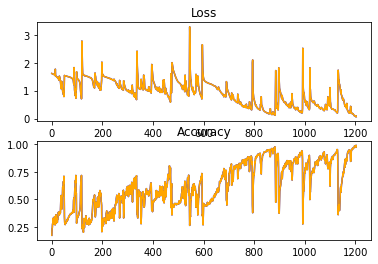

In [5]:
from matplotlib import pyplot

# plot loss
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['accuracy'], color='orange', label='test')
# save plot to file
# filename = sys.argv[0].split('/')[-1]
# pyplot.savefig(filename + '_plot.png')
pyplot.show()

In [6]:
# PREDICT prediction FROM x_test
import numpy as np
predictions = model.predict(x_test_data_floats)
predictions = np.argmax(predictions, axis=1) # THAT'S YOUR JOB
print(predictions.shape)
print(predictions)


(250,)
[2 4 1 1 0 4 2 0 4 2 4 3 3 2 0 3 3 2 3 2 0 4 2 4 0 3 2 0 1 4 1 1 1 1 0 0 4
 3 1 3 2 2 2 4 3 4 1 0 1 0 1 2 4 4 3 0 0 4 4 2 1 2 3 0 3 1 2 2 4 3 3 4 2 3
 3 1 1 4 4 0 1 0 0 1 2 0 4 0 4 2 2 3 2 3 2 3 4 1 2 1 2 4 2 1 0 3 3 1 3 3 0
 1 1 0 4 4 2 0 1 4 2 0 4 2 3 2 4 0 1 0 2 4 0 1 2 0 4 2 2 1 3 0 1 0 0 0 2 2
 2 2 0 0 0 3 3 4 4 4 2 1 1 0 3 1 1 1 2 2 1 3 4 4 1 3 1 3 4 0 1 2 4 3 0 4 2
 1 3 1 4 3 2 3 1 0 0 0 4 2 3 2 4 3 2 1 1 4 3 1 4 0 1 1 1 1 0 3 4 3 1 3 4 3
 1 3 1 0 2 4 2 3 0 4 4 3 0 2 3 3 3 3 0 4 0 4 3 0 2 2 0 0]


In [8]:
# MAKE SURE THAT YOU HAVE THE RIGHT FORMAT
assert predictions.ndim == 1
assert predictions.shape[0] == 250

# AND SAVE EXACTLY AS SHOWN BELOW
np.save('results/prediction.npy', predictions)